# The Pendulum Wave Machine

This project blends the code, images, animations, graphs, and written calculations collectively in a complete jupyter notebook.

From the get-go, I knew I had to build a neat animation. I wanted to create something artful. I needed to make something that would be fun and exciting to look at. So I watched numerous Youtube videos in search of an idea that pleased me. I stumbled upon a Newton's Cradle video that I initially planned to replicate in python code. However, I saw in the corner of my eye a video that was titled "Pendulum wave machine." I watched it and knew right there that I found my project. 

The video showed 15 golf balls hanging next to each other. The golf balls alternated colors so that white was the color of every other ball. The first golf ball was hanging the lowest (had the longest string), and the last golf ball had the shortest length. When all of the pendulums were released together, they began swinging at their own pace back and forth. In the beginning, they swang in a snake formation; shortly after, there was chaos before the balls came in sync with each other again to create more attractive patterns. This was just what I was looking for.

Video: https://www.youtube.com/watch?v=p2W6JrAvze8&t=5s

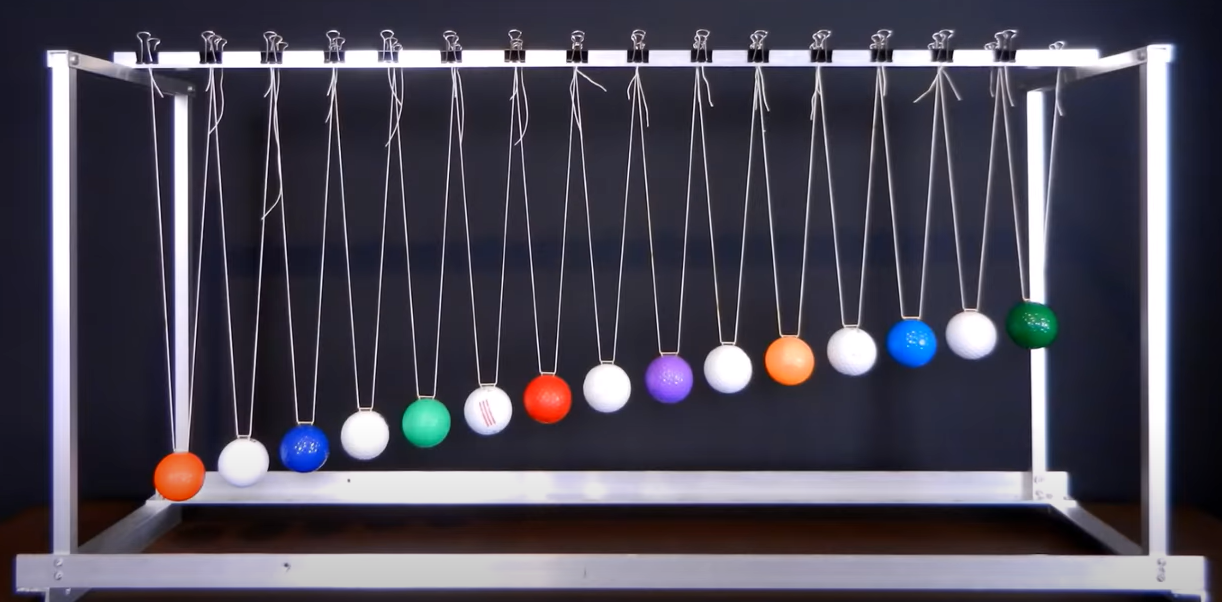

I started right there from scratch, creating 16 pendulums manually and coloring them in the same order presented in the video. I had only watched the video once, so I wasn't aware of the necessary equations to get the pendulum working as displayed. This was frustrating, but I did some research online and went back to the chapter in our textbook on ode's to find the differential equation of the pendulums. Then I was finally able to make them all swing. However, I made the mistake of making each pendulum length differ by a constant value, meaning that the pendulums formed a straight line from the longest pendulum to the smallest pendulum. 

This made my initial pendulum swing simulation pure chaos. There was no order and no patterns. The pendulums never made a snake, similar to the one in the video I watched. So, I went back to the video description and clicked a link, which had all the lengths that the person used for their pendulums. The lengths were very small, and when I used them for my pendulums, the animation didn't work because the ball radii were too large. I then found another video explaining how to calculate the lengths of each pendulum so that the simulation would work. This video was just what I needed. Here is the derivation of the equation I used from this website: https://www.education.com/science-fair/article/pendulum-waves/

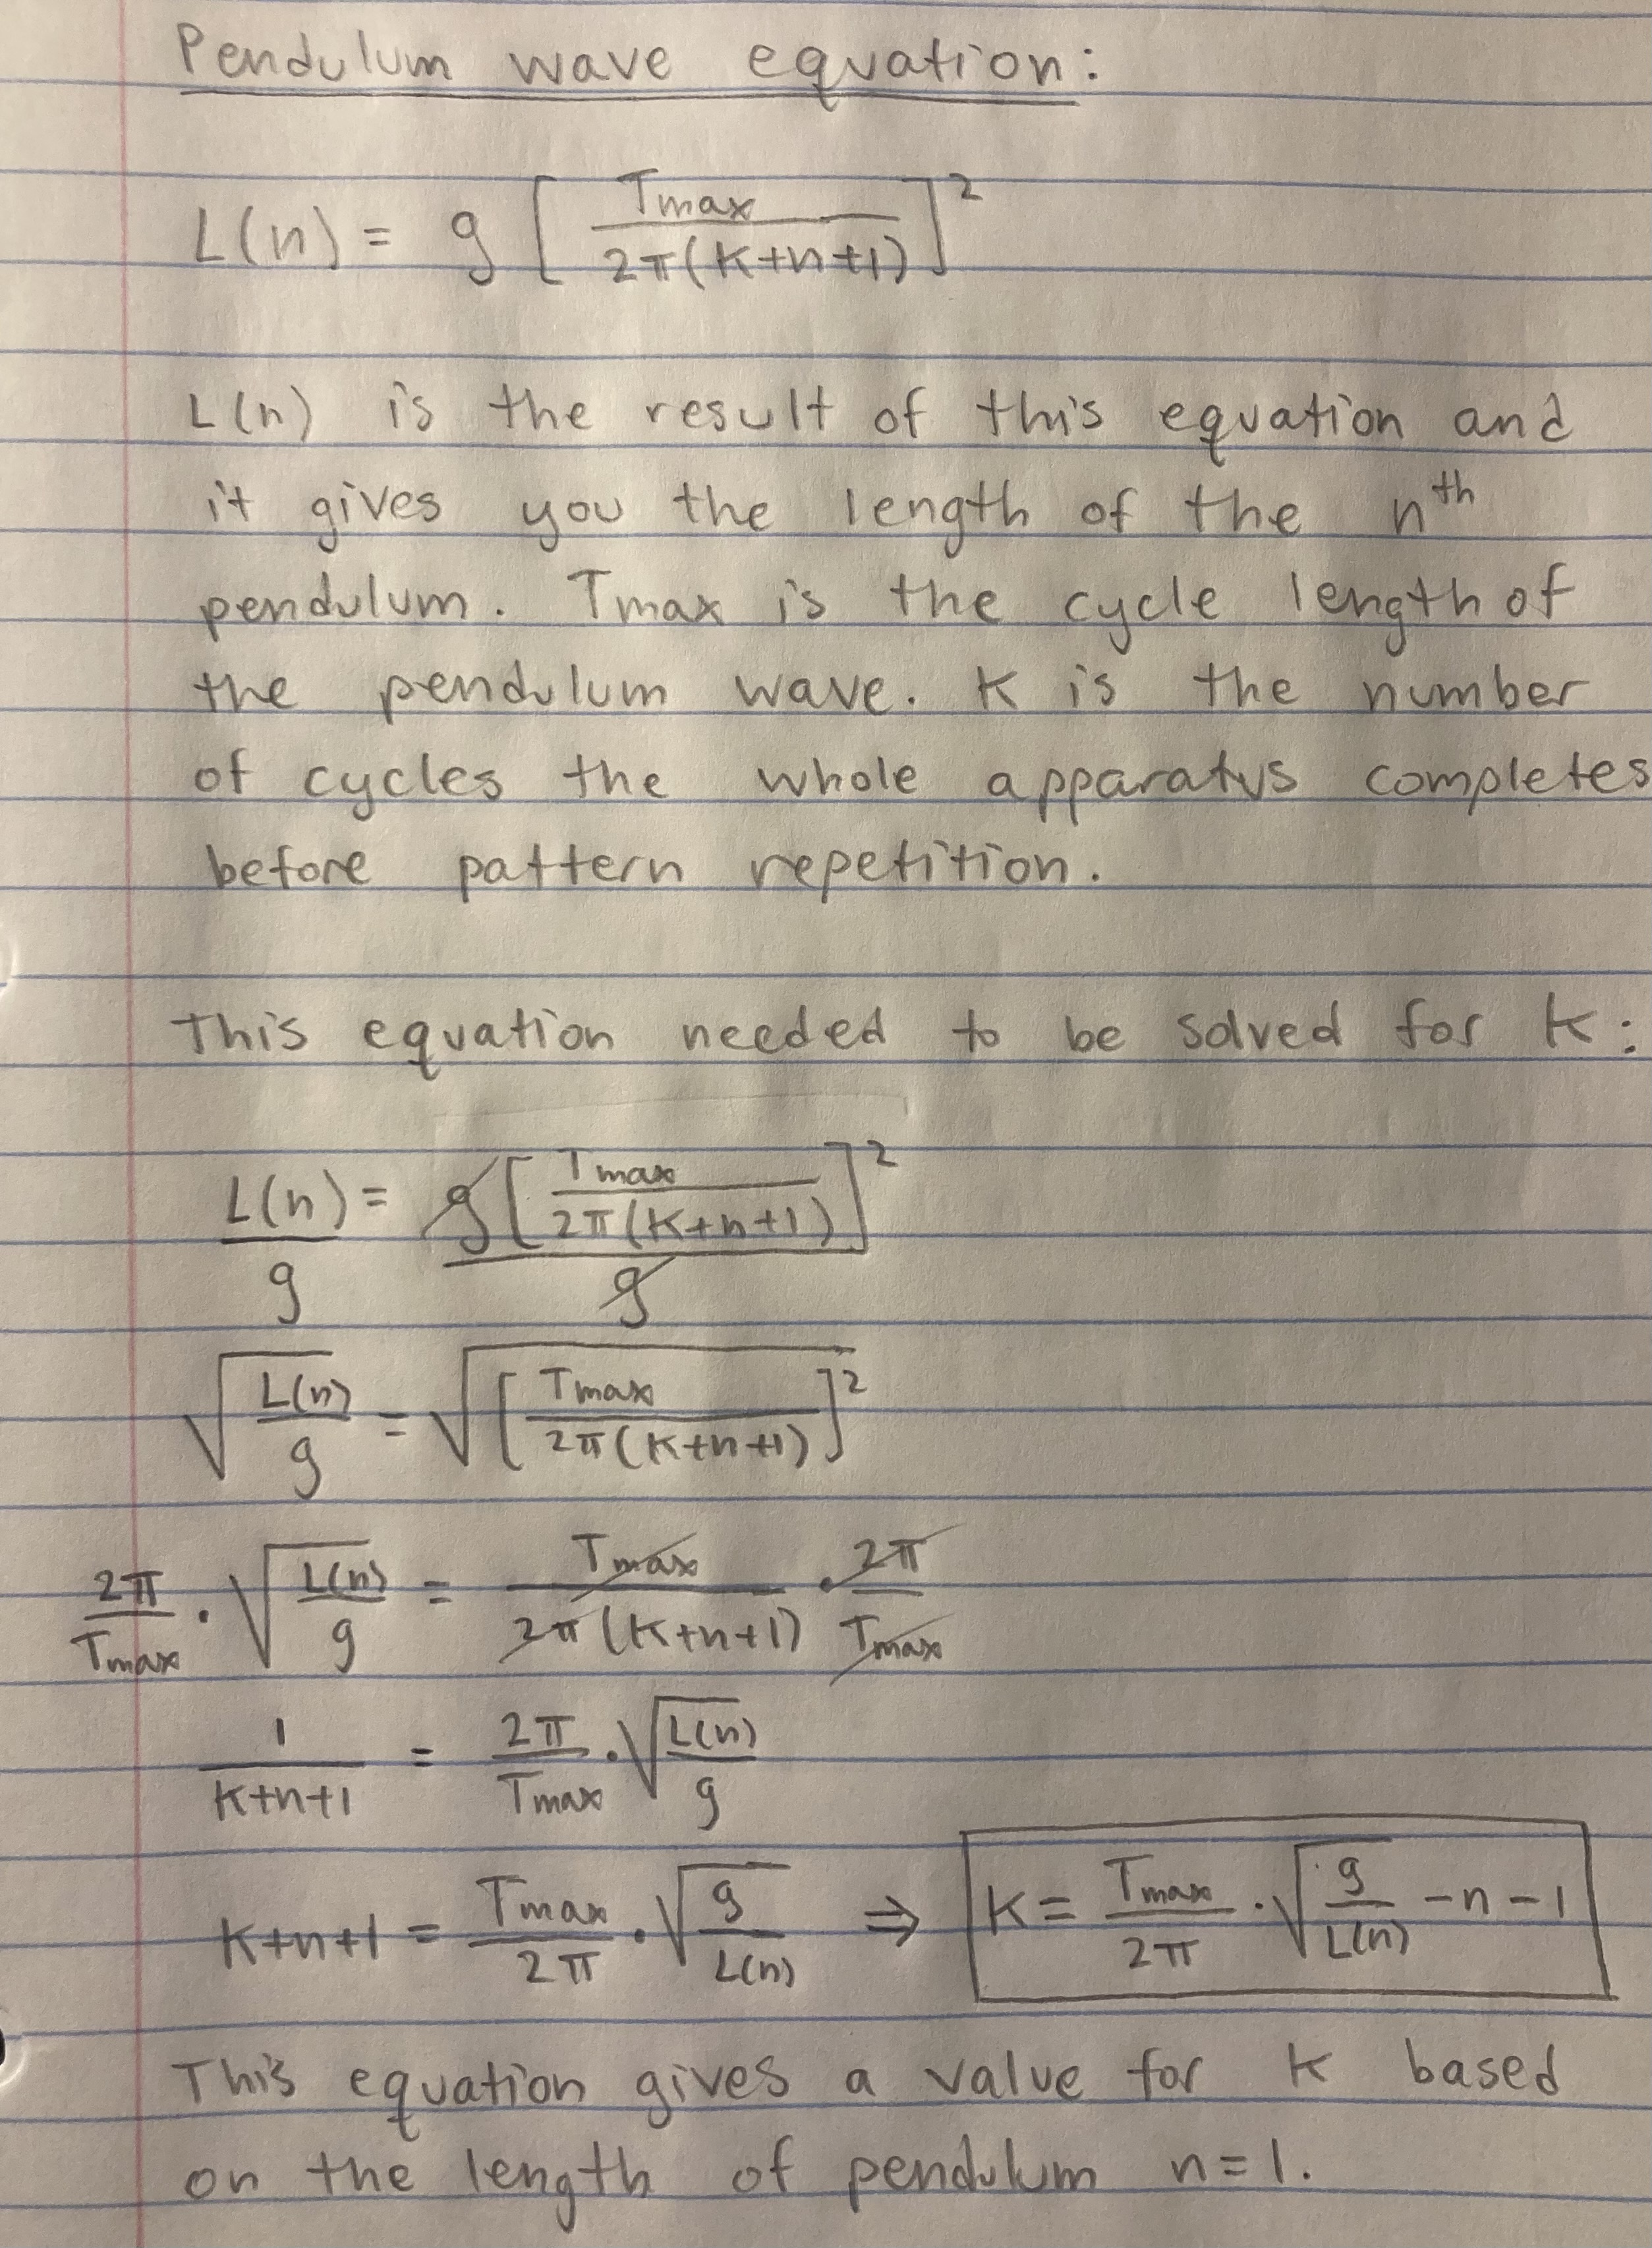

Next, I derived this equation in python, giving my initial values. I got a list of pendulum lengths based on the equation that worked great for my animation. Here is the code for (Part 1):

In [2]:
"""
Part 1)
    This cell will create the appropriate lengths for each pendulum
    based on the length of the first pendulum and store them in an 
    array in order to get the animation to work correctly. We use the
    equation derived in the cell above.
"""
from scipy.constants import g # get the gravitational force
from math import pi, pow, sqrt
from numpy import zeros, arange, sin, cos, array

# Initial values:
T_max = 2*60 # amount of time in seconds until repeating pattern
n = 1; # the pendulum we are at (first one here)
L = 10 # length in meters of the very first pendulum // default: 10
k = T_max/(2*pi)*sqrt(g/L)-n-1 # constant based on the length of the pendulum

# Create the array of pendulum lengths:
pendulum_length = zeros([16],float); # array of pendulum lengths with 16 pendulums
pendulum_length[0] = L # assign the first pendulum with initial length L

# Calculates the correct lengths of each next pendulum:
index = 1 # next pendulum stored in the array
for n in arange(2,17): # there are 15 pendulums to calculate the correct lengths
    pendulum_length[index] = g*pow(T_max/(2*pi*(k+n+1)), 2) # length of the pendulum in meters
    index += 1 # increnment the index to store value of next pendulum length in the array

In [3]:
"""
This cell displays the lengths of each pendulum on the apparatus.
"""
print("Pendulum Lengths")
# run through pendulum_length list
pend = 1 # the pendulum we are at
for i in pendulum_length:
    length = f'{i:.2f}' # making each length have 2 significant figures
    print("\tPendulum {}: {} meters" .format(pend,length))
    pend += 1 # go to the next pendulum

Pendulum Lengths
	Pendulum 1: 10.00 meters
	Pendulum 2: 9.02 meters
	Pendulum 3: 8.18 meters
	Pendulum 4: 7.45 meters
	Pendulum 5: 6.81 meters
	Pendulum 6: 6.26 meters
	Pendulum 7: 5.76 meters
	Pendulum 8: 5.33 meters
	Pendulum 9: 4.94 meters
	Pendulum 10: 4.59 meters
	Pendulum 11: 4.28 meters
	Pendulum 12: 4.00 meters
	Pendulum 13: 3.74 meters
	Pendulum 14: 3.51 meters
	Pendulum 15: 3.30 meters
	Pendulum 16: 3.11 meters


Once I accurately calculated all the 16 lengths of each pendulum in the apparatus, I oriented them using vpython. I made sure to space the balls evenly apart and create a holder for the strings so that the visual looked more realistic, just like in the video and the image I showed above. I decided to leave each pendulum implemented individually 16 times because it's what I had done originally, and it worked fine. Here is my code for creating the visual wave machine apparatus:

In [4]:
"""
Part 2)
    This cell is where I created each pendulum individually.
    There are 16 total pendulums that are created here. Each
    pendulum alternates in color. Every other pendulum is white.
"""
from vpython import *

# Set the screen width and height:
scene = canvas(); scene.width = 800; scene.height = 400

# Making the pendulum holder:
Length = 30 # length of holder
holder = cylinder(pos=vector(0,0,0), axis=vector(0,0,-Length), radius=1) # holder position

ball_1 = sphere(pos=vector(0,-pendulum_length[0],0), radius=1, color=color.orange) 
string_1 = cylinder(pos=vector(0,0,0), axis=vector(0,-pendulum_length[0],0), radius=0.06)

ball_2 = sphere(pos=vector(0,-pendulum_length[1],-2), radius=1, color=color.white)
string_2 = cylinder(pos=vector(0,0,-2), axis=vector(0,-pendulum_length[1],0), radius=0.06)

ball_3 = sphere(pos=vector(0,-pendulum_length[2],-4), radius=1, color=color.blue)
string_3 = cylinder(pos=vector(0,0,-4), axis=vector(0,-pendulum_length[2],0), radius=0.06)

ball_4 = sphere(pos=vector(0,-pendulum_length[3],-6), radius=1, color=color.white)
string_4 = cylinder(pos=vector(0,0,-6), axis=vector(0,-pendulum_length[3],0), radius=0.06)

ball_5 = sphere(pos=vector(0,-pendulum_length[4],-8), radius=1, color=color.green)
string_5 = cylinder(pos=vector(0,0,-8), axis=vector(0,-pendulum_length[4],0), radius=0.06)

ball_6 = sphere(pos=vector(0,-pendulum_length[5],-10), radius=1, color=color.white)
string_6 = cylinder(pos=vector(0,0,-10), axis=vector(0,-pendulum_length[5],0), radius=0.06)

ball_7 = sphere(pos=vector(0,-pendulum_length[6],-12), radius=1, color=color.red)
string_7 = cylinder(pos=vector(0,0,-12), axis=vector(0,-pendulum_length[6],0), radius=0.06)

ball_8 = sphere(pos=vector(0,-pendulum_length[7],-14), radius=1, color=color.white)
string_8 = cylinder(pos=vector(0,0,-14), axis=vector(0,-pendulum_length[7],0), radius=0.06)

ball_9 = sphere(pos=vector(0,-pendulum_length[8],-16), radius=1, color=color.purple)
string_9 = cylinder(pos=vector(0,0,-16), axis=vector(0,-pendulum_length[8],0), radius=0.06)

ball_10 = sphere(pos=vector(0,-pendulum_length[9],-18), radius=1, color=color.white)
string_10 = cylinder(pos=vector(0,0,-18), axis=vector(0,-pendulum_length[9],0), radius=0.06)

ball_11 = sphere(pos=vector(0,-pendulum_length[10],-20), radius=1, color=color.orange)
string_11 = cylinder(pos=vector(0,0,-20), axis=vector(0,-pendulum_length[10],0), radius=0.06)

ball_12 = sphere(pos=vector(0,-pendulum_length[11],-22), radius=1, color=color.white)
string_12 = cylinder(pos=vector(0,0,-22), axis=vector(0,-pendulum_length[11],0), radius=0.06)

ball_13 = sphere(pos=vector(0,-pendulum_length[12],-24), radius=1, color=color.blue)
string_13 = cylinder(pos=vector(0,0,-24), axis=vector(0,-pendulum_length[12],0), radius=0.06)

ball_14 = sphere(pos=vector(0,-pendulum_length[13],-26), radius=1, color=color.white)
string_14 = cylinder(pos=vector(0,0,-26), axis=vector(0,-pendulum_length[13],0), radius=0.06)

ball_15 = sphere(pos=vector(0,-pendulum_length[14],-28), radius=1, color=color.green)
string_15 = cylinder(pos=vector(0,0,-28), axis=vector(0,-pendulum_length[14],0), radius=0.06)

ball_16 = sphere(pos=vector(0,-pendulum_length[15],-30), radius=1, color=color.white)
string_16 = cylinder(pos=vector(0,0,-30), axis=vector(0,-pendulum_length[15],0), radius=0.06)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This next cell holds similar functions for each pendulum in the apparatus. The only difference between them is the index of the pendulum list and their position relative to each other on the apparatus. This cell took a lot of time to complete because I had to check the visual each time, making sure that the balls were connected to their respective strings and that they were swinging properly.

In [5]:
"""
Part 3)
    This cell holds the movement of each individual pendulum 
    in a movement function. Each function contains the length
    of that particular pendulum and also the angle for which 
    that pendulum will sway based on its length. There is a
    damping force inside each function so that the pendulums
    don't swing forever and thus creating a more realistic
    animation.
"""

def movement_of_pendulum_1(t,mu,theta_o):
    L = pendulum_length[0]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t) # equation of moving pendulum
    
    ball_1.pos = vector(L*sin(theta), -L*cos(theta), 0) # Update the ball's position
    string_1.axis = vector(L*sin(theta), -L*cos(theta), 0) # updating the string with the ball
    
def movement_of_pendulum_2(t,mu,theta_o):     
    L = pendulum_length[1]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)

    ball_2.pos = vector(L*sin(theta), -L*cos(theta), -2) 
    string_2.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_3(t,mu,theta_o):   
    L = pendulum_length[2]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
 
    ball_3.pos = vector(L*sin(theta), -L*cos(theta), -4) 
    string_3.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_4(t,mu,theta_o):  
    L = pendulum_length[3]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
    
    ball_4.pos = vector(L*sin(theta), -L*cos(theta), -6) 
    string_4.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_5(t,mu,theta_o):  
    L = pendulum_length[4]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
        
    ball_5.pos = vector(L*sin(theta), -L*cos(theta), -8)
    string_5.axis = vector(L*sin(theta), -L*cos(theta), 0)
    
def movement_of_pendulum_6(t,mu,theta_o):
    L = pendulum_length[5]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
    
    ball_6.pos = vector(L*sin(theta), -L*cos(theta), -10)
    string_6.axis = vector(L*sin(theta), -L*cos(theta), 0)
    
def movement_of_pendulum_7(t,mu,theta_o): 
    L = pendulum_length[6]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)

    ball_7.pos = vector(L*sin(theta), -L*cos(theta), -12)
    string_7.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_8(t,mu,theta_o):    
    L = pendulum_length[7]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
 
    ball_8.pos = vector(L*sin(theta), -L*cos(theta), -14)
    string_8.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_9(t,mu,theta_o):  
    L = pendulum_length[8]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
    
    ball_9.pos = vector(L*sin(theta), -L*cos(theta), -16)
    string_9.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_10(t,mu,theta_o):  
    L = pendulum_length[9]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
        
    ball_10.pos = vector(L*sin(theta), -L*cos(theta), -18)
    string_10.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_11(t,mu,theta_o):
    L = pendulum_length[10]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)

    ball_11.pos = vector(L*sin(theta), -L*cos(theta), -20)
    string_11.axis = vector(L*sin(theta), -L*cos(theta), 0)
    
def movement_of_pendulum_12(t,mu,theta_o):   
    L = pendulum_length[11]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)

    ball_12.pos = vector(L*sin(theta), -L*cos(theta), -22)
    string_12.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_13(t,mu,theta_o):    
    L = pendulum_length[12]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
 
    ball_13.pos = vector(L*sin(theta), -L*cos(theta), -24)
    string_13.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_14(t,mu,theta_o):  
    L = pendulum_length[13]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
    
    ball_14.pos = vector(L*sin(theta), -L*cos(theta), -26)
    string_14.axis = vector(L*sin(theta), -L*cos(theta), 0)

def movement_of_pendulum_15(t,mu,theta_o):  
    L = pendulum_length[14]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
        
    ball_15.pos = vector(L*sin(theta), -L*cos(theta), -28)
    string_15.axis = vector(L*sin(theta), -L*cos(theta), 0)
    
def movement_of_pendulum_16(t,mu,theta_o):  
    L = pendulum_length[15]; theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)
        
    ball_16.pos = vector(L*sin(theta), -L*cos(theta), -30)
    string_16.axis = vector(L*sin(theta), -L*cos(theta), 0)

Once every pendulum was in place, and the animation looked just like the apparatus in the Youtube video, I was ready to implement the functions. I created a time interval that lasted for 2 minutes and then added damping to the motion of the pendulums to make the animation more realistic. The animation will play in the same cell that holds the visual of all the pendulums in (Part 2) above.

In [ ]:
"""
Part 4)
    This is the cell that creates the time interval of the pendulums.
    The for loop calls the pendulum functions to have them all swing
    at the same time together to complete the animation.
"""
# Time interval and step of swing in seconds
t1 = 0; t2 = 3*60; tstep = 0.005
tpoints = arange(t1,t2,tstep)

# The damping constant
#mu = 0.02 # default 0.02
mu = 0

# Setting the pudulum constants:
theta_o = 1.2 # angle in radians

"""
The below animation will run below the cell that contains (Part 2) above. 
To see the pendulum wave machine, scrole up to the visualization 
after running this cell.
"""
for t in tpoints: # run through the time interval
    rate(275)
    movement_of_pendulum_1(t,mu,theta_o) 
    movement_of_pendulum_2(t,mu,theta_o) 
    movement_of_pendulum_3(t,mu,theta_o) 
    movement_of_pendulum_4(t,mu,theta_o) 
    movement_of_pendulum_5(t,mu,theta_o) 
    movement_of_pendulum_6(t,mu,theta_o) 
    movement_of_pendulum_7(t,mu,theta_o) 
    movement_of_pendulum_8(t,mu,theta_o) 
    movement_of_pendulum_9(t,mu,theta_o) 
    movement_of_pendulum_10(t,mu,theta_o) 
    movement_of_pendulum_11(t,mu,theta_o) 
    movement_of_pendulum_12(t,mu,theta_o) 
    movement_of_pendulum_13(t,mu,theta_o)
    movement_of_pendulum_14(t,mu,theta_o) 
    movement_of_pendulum_15(t,mu,theta_o)
    movement_of_pendulum_16(t,mu,theta_o)

## Graphical Methods for Solving the ODE 

At first go, I didn't use any numerical methods that we learned in the course. I had only created vpython shapes and put them together, solved a couple of equations, and got the pendulums to work, just like in the video. So, I went to the textbook and reviewed a few methods to plot the graph of the pendulum's movement based on time and angle. I searched the internet endlessly for help to create a moving animation graph of the pendulum wave from a bird's eye view because that animation is very cool. However, I started to run out of time. So, I used the theta equation and the equation of motion from the previous cells to graph the movement of one of the pendulums using multiple ODE solving techniques to test the similarities and differences of each. Here was my work for solving the initial problem of the pendulum and getting the ODE:

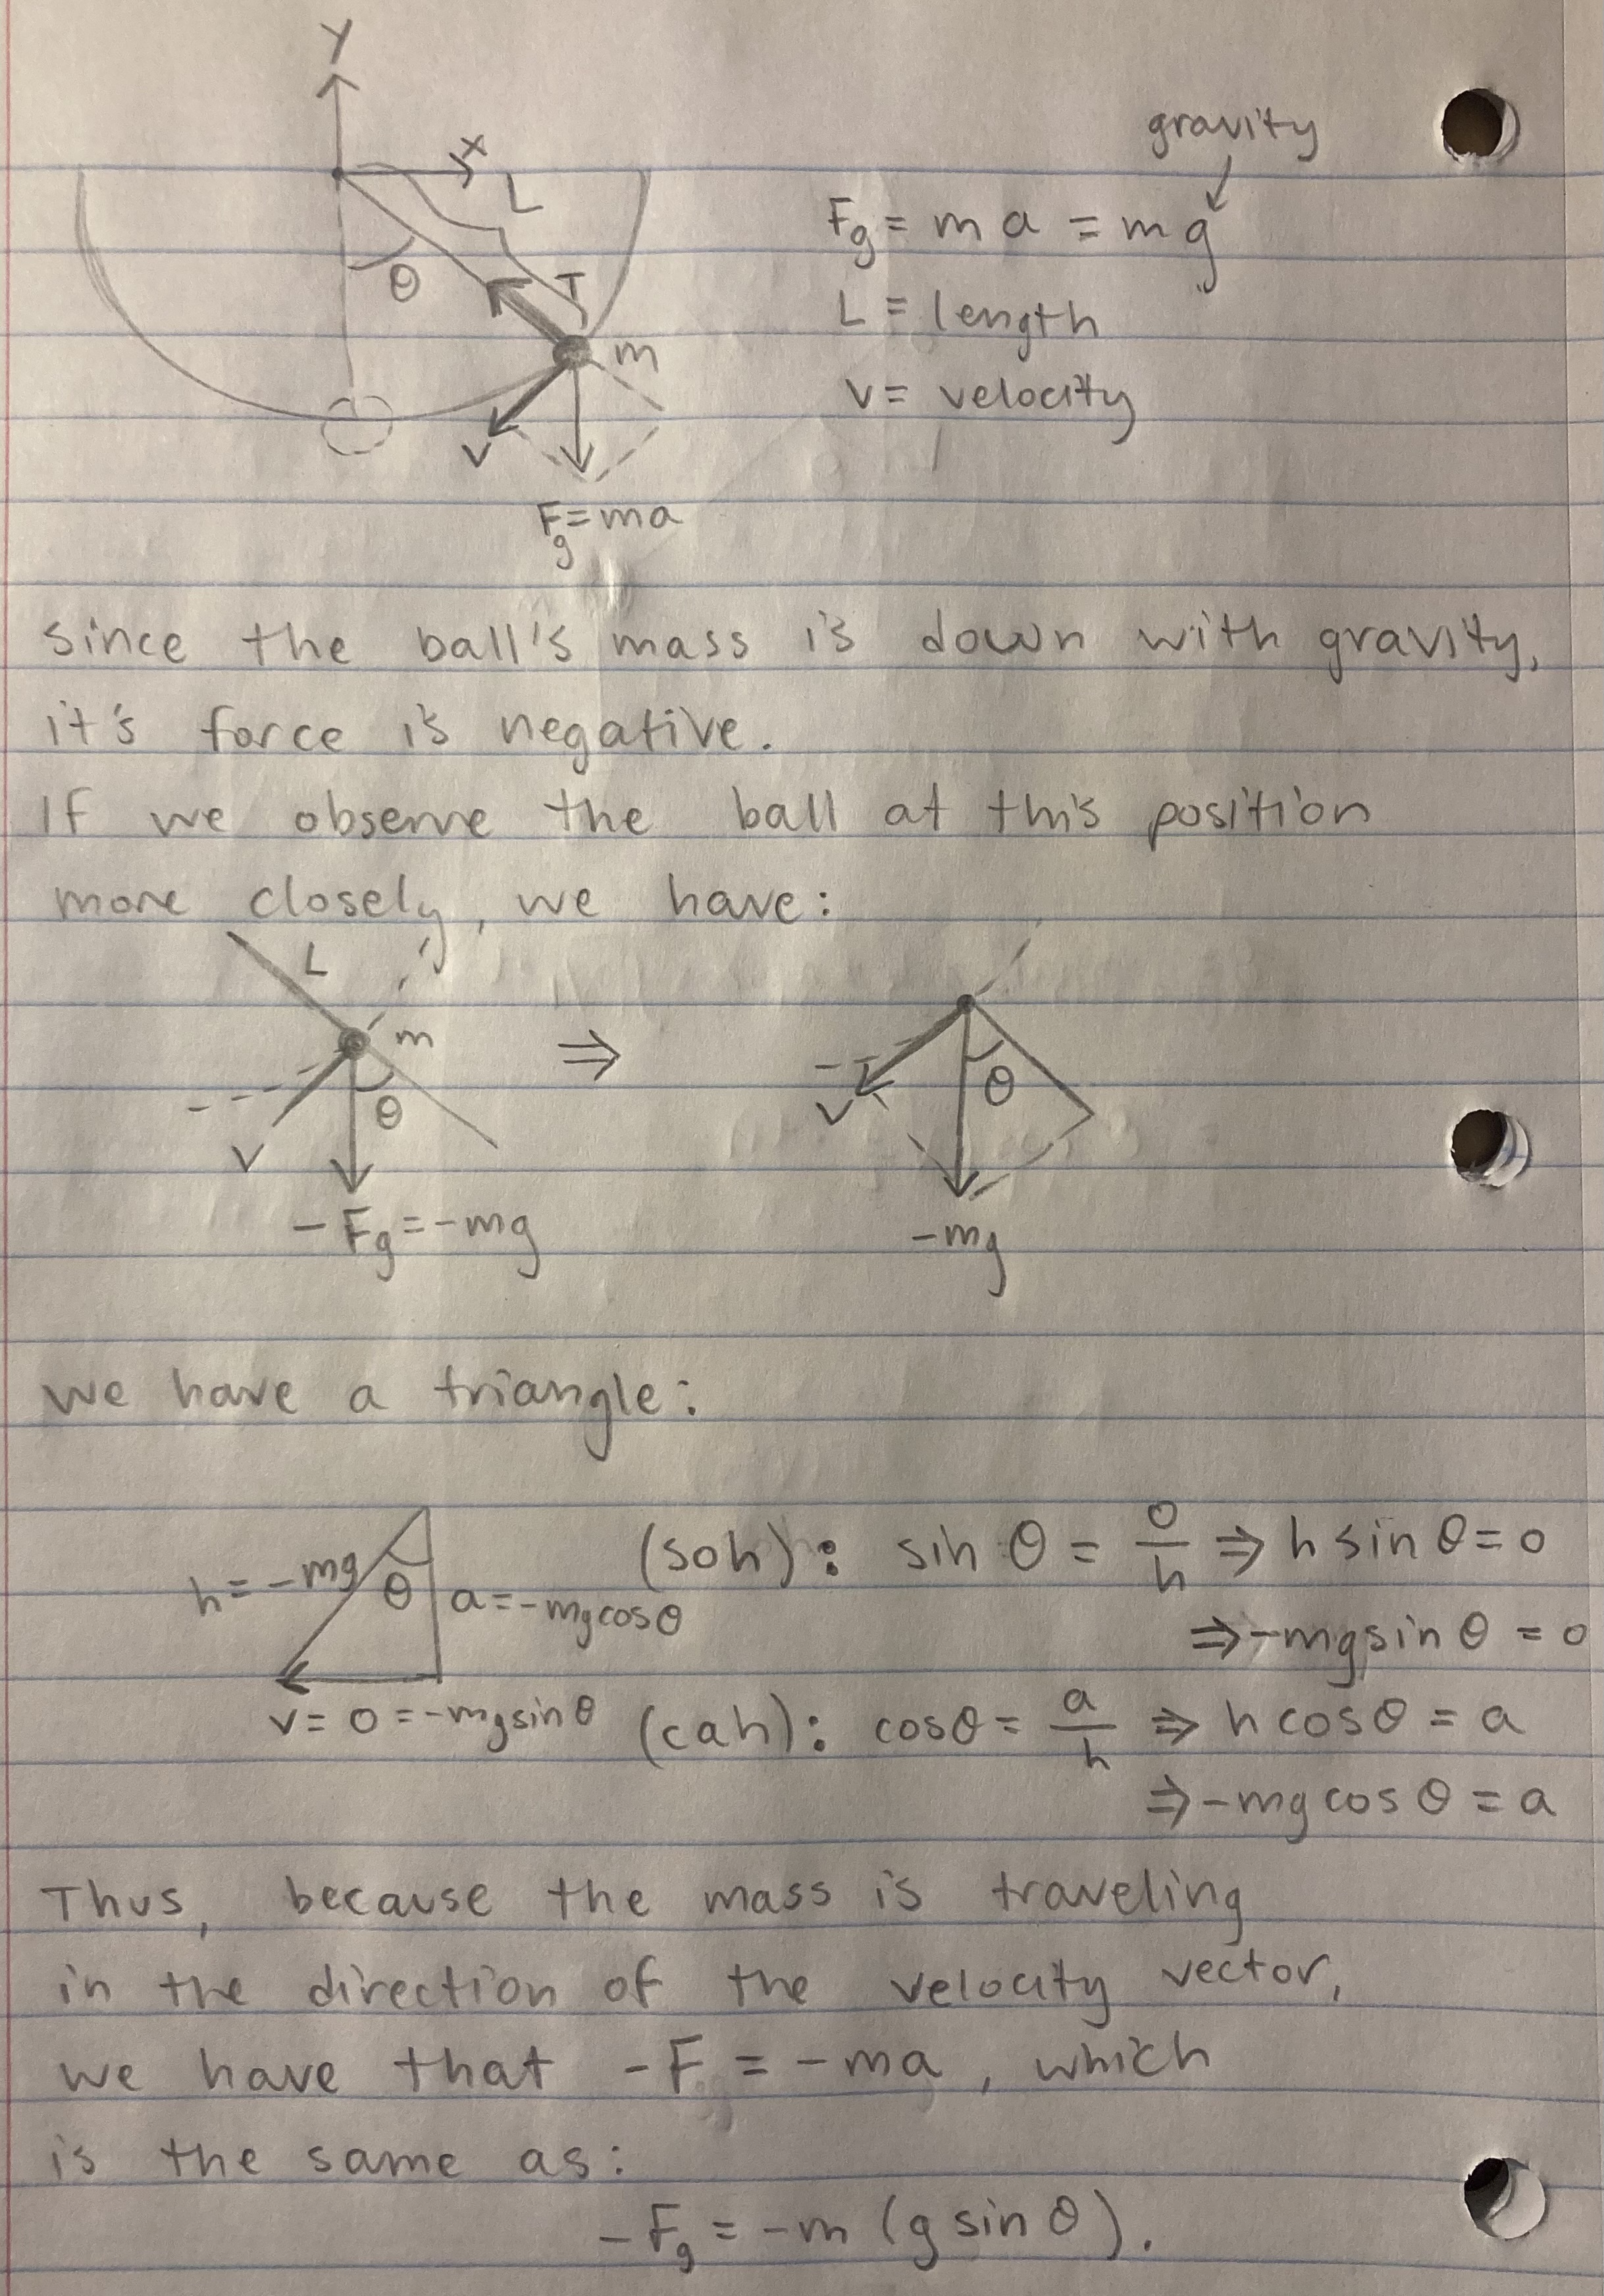

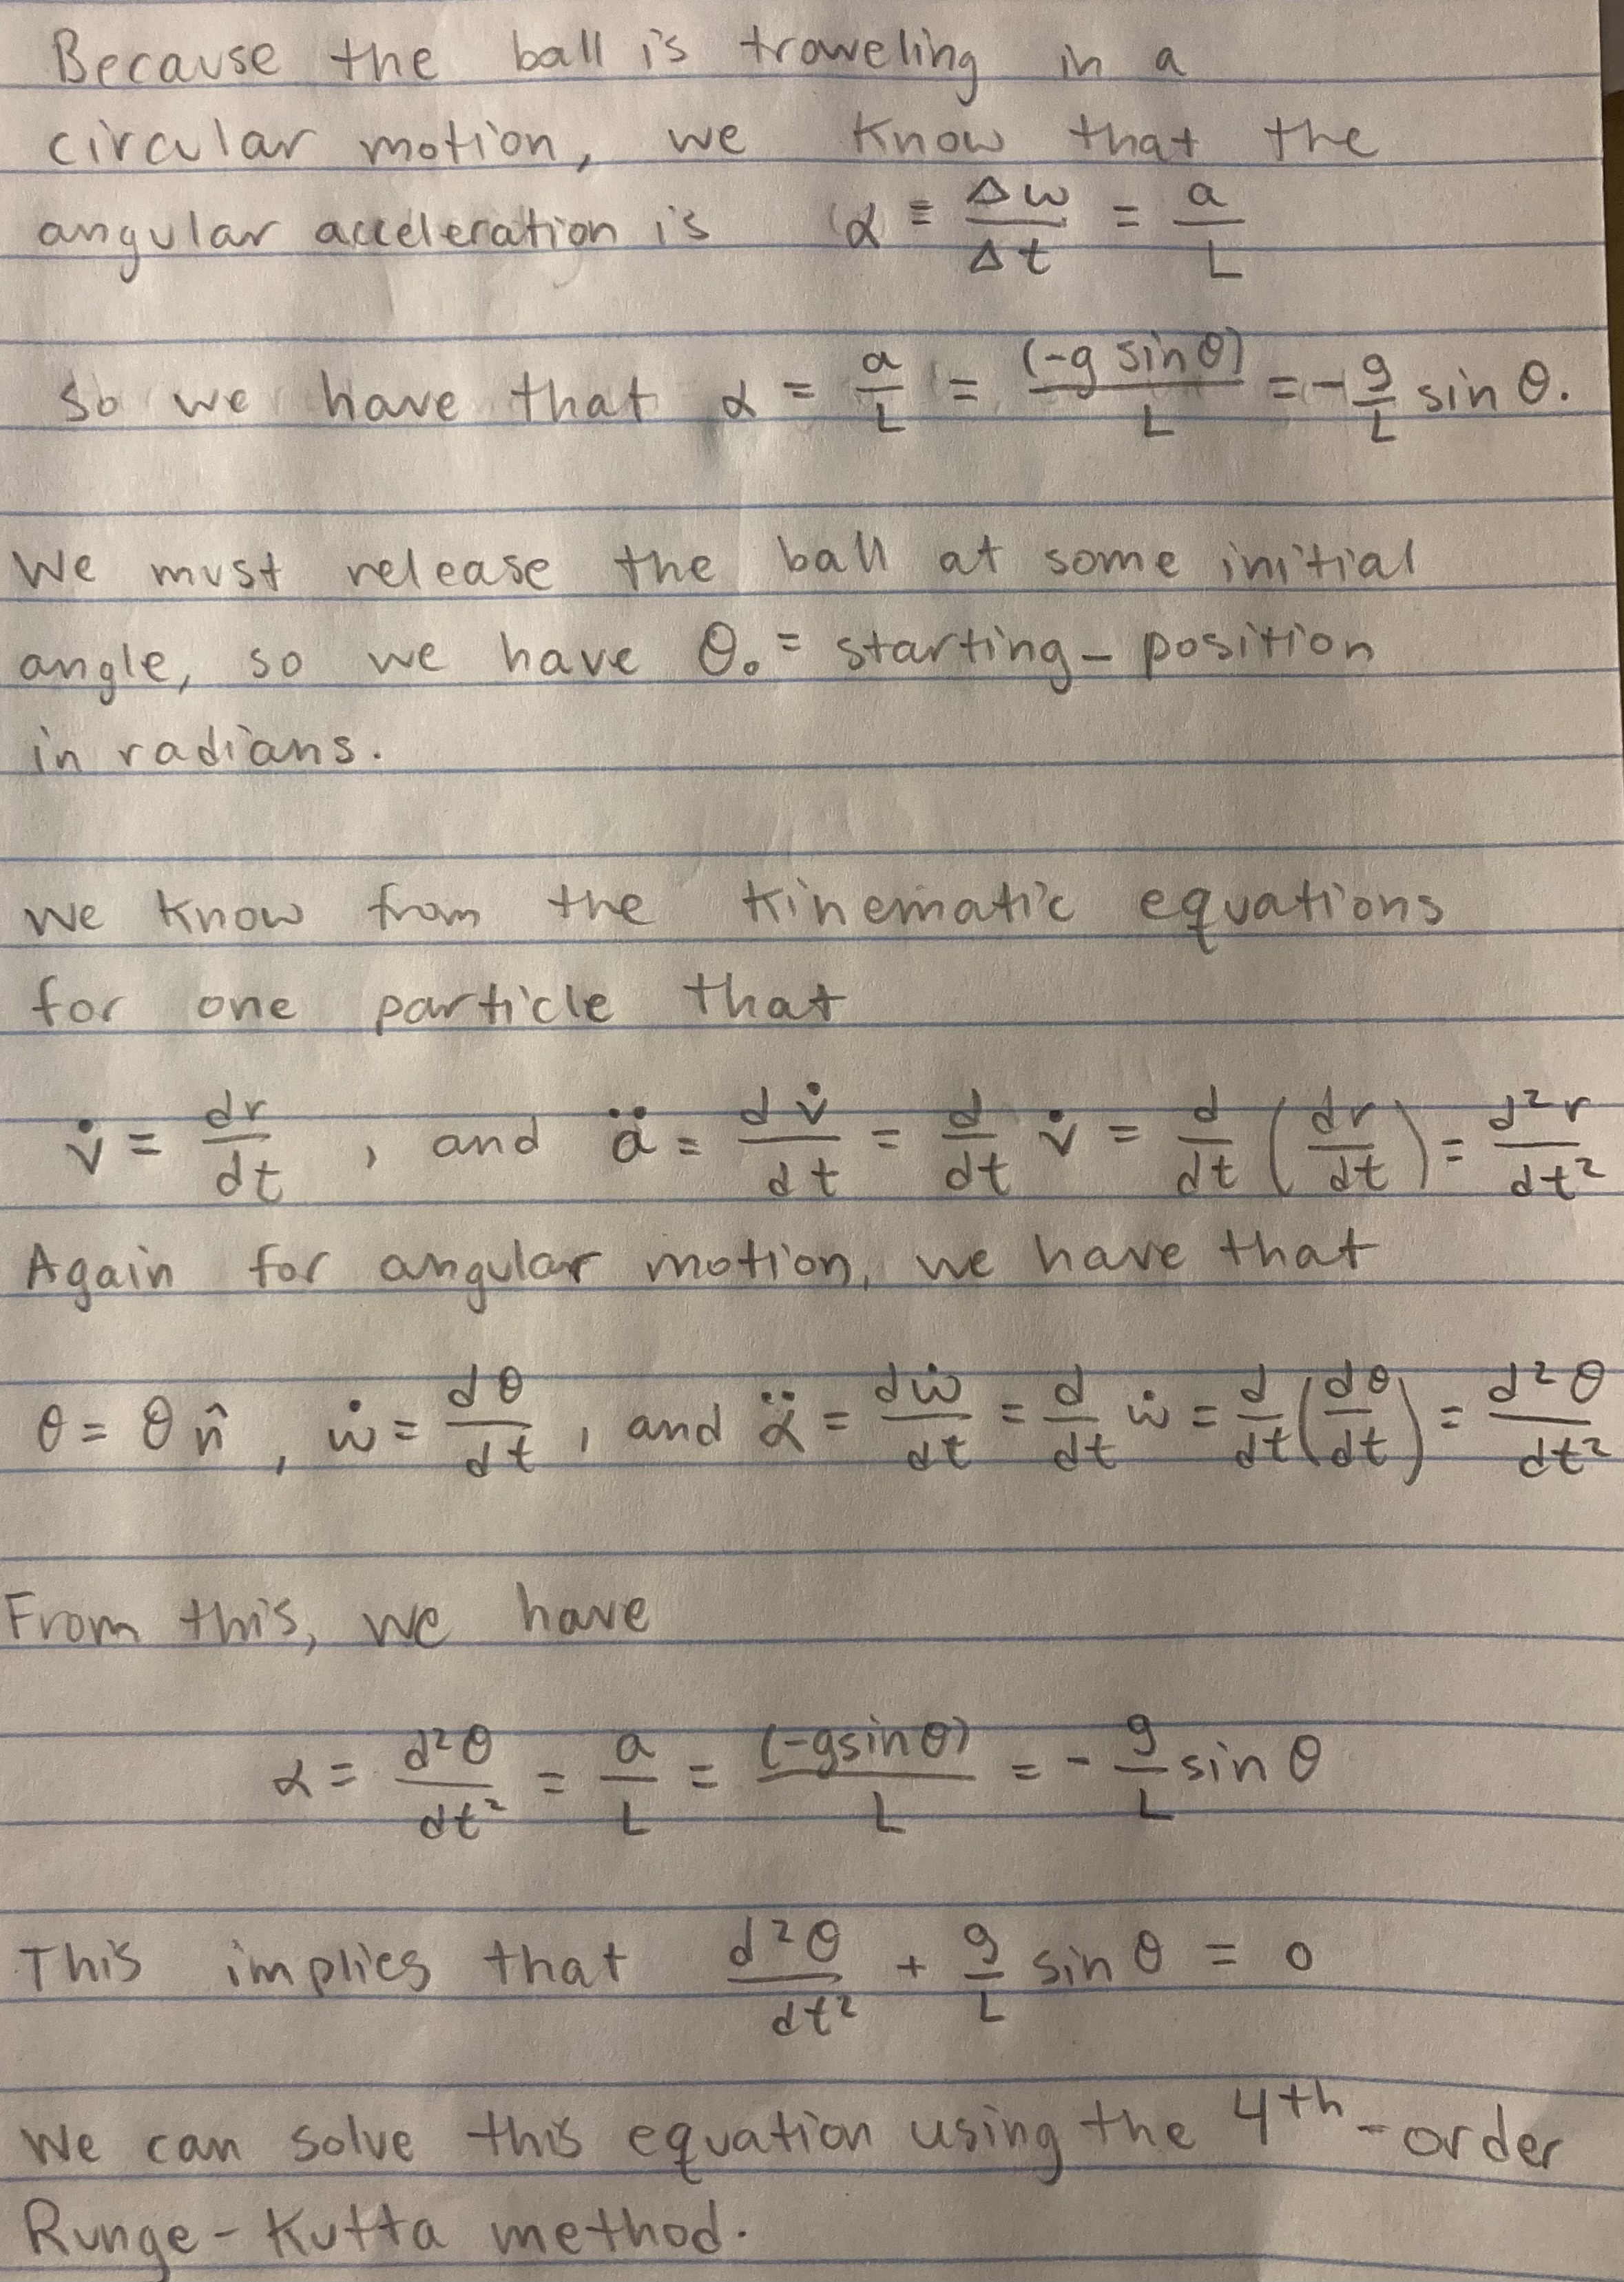

Once I got the ODE, I used three methods from our textbook to solve it. I brought back all of the constants from the previous cells and applied Euler's method. Then I also applied the second and fourth-order Runge-Kutta methods to see how well they solved the ODE. Here is the code:

In [ ]:
"""
Part 5)
    This cell shows plots of the pendulums using the Euler method, 
    the second-order Runge-Kutta method, and the fourth-order Runge-Kutta 
    method that was in chapter 8 of our computational physics textbook.
"""
import matplotlib.pyplot as plt

# The pendulum constants determined previously:
L = 10 # pendulum length in meters // default is 10
N = (t2-t1)/tstep # number of sample points
h = (t2-t1)/N # the step size
mu = 0.02 # default 0.02
theta_o = 1.2 # angle in radians of release
theta = theta_o*exp(-mu*t)*cos(sqrt(g/L)*t)

def f(r,t): # function to solve the ODE 
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/L)*sin(theta)
    return array([ftheta, fomega],float)

#############################
###### Euler's Method #######
#############################
theta_points1 = [] # list to hold theta values
r1 = array([theta_o,0],float) # aray values to be stored in theta_points list for plot
for t in tpoints: # Euler's method
    theta_points1.append(r1[0])
    r1 += h*f(r1,t)

# Visualizing the plot with Euler's method:
plt.title("Pendulum Wave using Euler's Method") 
plt.xlabel("Time in Seconds"); plt.ylabel("Theta Points in Radians")
plt.plot(tpoints, theta_points1, 'b')
plt.grid(True); plt.show()

#########################################
#### Second-Order Runge-Kutta Method ####
#########################################
theta_points2 = [] # list to hold theta values
r2 = array([theta_o,0],float) # aray values to be stored in theta_points list for plot
for t in tpoints: # 2nd-order Runge-Kutta method
    theta_points2.append(r2[0])
    k1 = h*f(r2,t)
    k2 = h*f(r2+0.5*k1,t+0.5*h)
    r2 += k2
    
# Visualizing the plot with Second-Order Runge-Kutta method:
plt.plot(tpoints, theta_points2, 'g')
plt.title("Pendulum Wave Using Second-Order Runge-Kutta Method")
plt.xlabel("Time in Seconds"); plt.ylabel("Theta Points in Radians")
plt.grid(True); plt.show()

#########################################
#### Fourth-Order Runge-Kutta Method ####
#########################################
theta_points3 = [] # empty list of theta values
r3 = array([theta_o,0],float) # aray values to be stored in theta_points list for plot
for t in tpoints: # 4th-order Runge-Kutta
    theta_points3.append(r3[0])
    k1 = h * f(r3,t)
    k2 = h * f(r3+0.5*k1,t+0.5*h)
    k3 = h * f(r3+0.5*k2,t+0.5*h)
    k4 = h * f(r3+k3,t+h)
    r3 += (1/6)*(k1+2*k2+2*k3+k4)

# Visualizing the plot with Fourth-Order Runge-Kutta method:
plt.plot(tpoints, theta_points3, 'r')
plt.title("Pendulum Wave Using Fourth-Order Runge-Kutta Method")
plt.xlabel("Time in Seconds"); plt.ylabel("Theta Points in Radians")
plt.grid(True); plt.show()

As we can see from the computational methods, they all output similar graphs to one another. However, there is a notable difference in Euler's method graph as it is the least accurate of the three methods. I was surprised to see that the graph from the second-order Runge-Kutta method was the same as the graph from the fourth-order Runge-Kutta method. I assumed that the second-order Runge-Kutta method would have a noticeable difference in accuracy, but when I graphed both methods on the same plot, they overlapped each other perfectly. So apparently, for pendulums, the second-order Runge-Kutta method is a good enough approximation on a visual scale.

## Conlusion and Summary

What I learned from this project was that if you don't have the materials to make a pendulum yourself, but you do have the knowledge of a programming language such as python, then you can almost replicate exactly what the real-life pendulum does. I found it amazing that I was creating something online from scratch myself just by doing some research. I was impressed that the vpython visualization came out the way it did. I might try to create a real-life pendulum wave machine and use all of the equations I used in this notebook to help me create the perfect lengths for it. I certainly had a lot of fun coming up with the correct implementation of the apparatus and respective functions and solving the formulas. The research part was also fun because I became more familiar with pendulums in the process.

It was also nice to reread parts of chapter eight in our textbook to try to figure out how to get the computational methods to work. I got a good refresher on the Runge-Kutta methods of solving ODE computationally. I think that our textbook is filled with incredible material that I will certainly review and explore more deeply in the future. I certainly learned a lot this term and in this class as a whole. This project was super fun to make and learn more about the pendulums and how they work with gravity and damping motion. Thank you for a great term!

### Resources Used for Creating this Project:

The video that inspired me to create this project:
    https://www.youtube.com/watch?v=p2W6JrAvze8&t=5s

How I got the equation for (Part 1): (k = T_max/(2*pi)*sqrt(g/L)-n-1)
    https://www.youtube.com/watch?v=_8JMVl-_KKs&t=0s // 4:46 minute mark //

Equation of moving pendulum (Part 3): (theta(t) = theta_o*cos(sqrt(g/L)*t))
    https://socratic.org/questions/what-is-the-formula-for-speed-of-pendulum-at-any-point

Other sources:
    https://courses.lumenlearning.com/physics/chapter/16-4-the-simple-pendulum/